# Pre-processing of Datset

In [10]:
# import relevant libraries
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Collecting data courtesy of New York Presbyterian Hospital Knowledge Base

In [11]:
# importing training data
dftrain = pd.read_csv('Training.csv')

# importing testing data
dftest = pd.read_csv('Testing.csv')

In [12]:
# visualising first 5 rows of training dataset
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [13]:
# visualising first 5 rows of testing dataset
dftest.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Preliminary data summary
> The unprocessed training dataset contains 134 columns while the testing dataset contains 133 columns. Upon inspecting these columns, the disparity is found to be in the training dataset. The 132 columns pertain to the disease symptoms which will be the features for the machine learning model. Moreover, the last column called "prognosis" is the disease diagnosis as a result of certain symptoms, the prognosis column will be the lable, i.e the value the machine learning model will try to predict. In the next steps we will using a data mining technique, namely pre-processing to convert the data into a more understandable format for our machine learning models to use.

## Data Pre-processing
>This step will find any missing or empty data and resolve these missing values. As we found above, the training dataset will need some processing to have the same columns as the datasets.

In [14]:
# displaying info about TRAINING dataset
# display the number of entries, the number and names of the column attributes, the data type and digit placings
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


>From above we can see that the training dataset contains 1 qualitative discrete categorical value given by object(1), 132 quantitative discrete binary values given by int64(132) and 1 quantitative continuous numerical float float64(1).

In [15]:
# identify null values in training dataset
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

>Here we can see that we have an empty column given by 'Unnamed: 133'. This column was the last column of the training dataset. Other than this column, no other columns have null values. Hence we will drop this column and move on to analysing the test dataset.

In [16]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [17]:
# displaying infor about TESTING dataset
# display the number of entries, the number and names of the column attributes, the data type an digit placings
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


>From above we can see that the training dataset contains 1 qualitative discrete categorical value given by object(1)and 132 quantitative discrete binary values given by int64(132).

In [18]:
# identify null values in testing dataset
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

>Hence from above we can see that there are no null values in the testing dataset

## Data Duplication
>Duplicated rows are not dropped in the training dataset. The dataset has no unique identifers e.g Patient 1, Patient 2 etc. It is logical to assume that the records are not duplicated since we expect that symptoms for diseases would be similar for a given disease. Hence the duplications in the training dataset were not erased. Also it can be seen below that the records in the test data are not duplicated as this would be redundant to test our machine learning models.

In [34]:
# detect duplicated records
dftest[dftest.duplicated(subset = None, keep = False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


## Pre-processing Summary
>Both the training and testing dataset have now been cleaned so we can now see information relating to the final datasets as well as the labels and features that will be used my the machine learning models later.

In [19]:
# display cleaned training data info
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [20]:
# display cleaned testing data info
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [22]:
# display features of training and testing data
print(list(dftrain.columns))

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [25]:
# display labels of training and testing data
print(list(sorted(dftrain.prognosis.unique())))

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']


# Exploratory Data Analysis (EDA)
>This form of analysis aims to perform initial investigations on the data to try and discover any trends to help improve the accuracy of diagnosing diseases.

In [26]:
# list and count the target class label names and their frequency for TRAINING data
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

In [27]:
# list and count the target class label names and their frequency for testing data
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

>The above outputs show that in the training data, the number of "trials" for each label is equal, the same is seen in the testing data with only the "Fungal Infection" label having one more trial than the other labels. This proportionality is important for the correlation heatmaps as well as other visualisation that will compare the presence of absence of a symptom over the entire respective datasets. 

## Visualisation of Symptoms
The following will identify the frequency of each individual symptom with response to their abscence or presence. If you remember from the start, the presence of a symptoms is denoted by a 1 and its absence is denoted by a 0.

<ipython-input-28-c68bf4250c14>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(2,2))


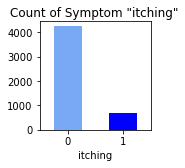

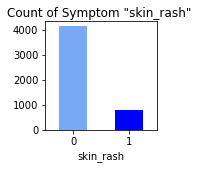

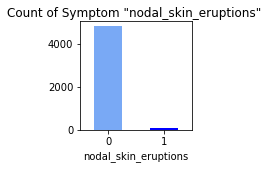

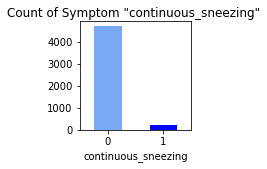

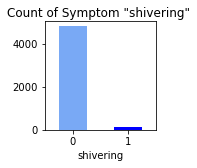

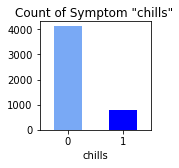

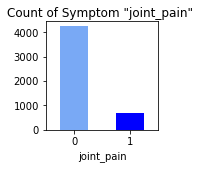

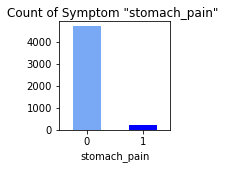

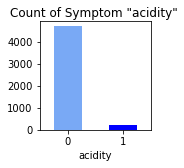

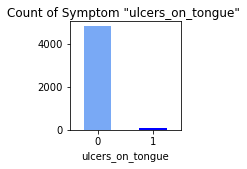

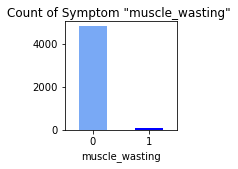

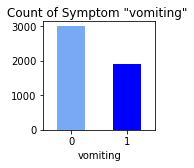

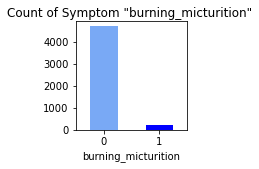

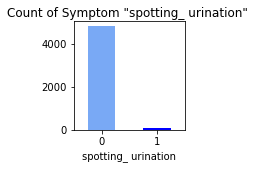

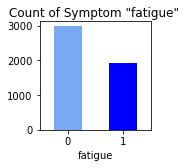

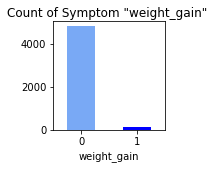

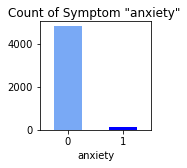

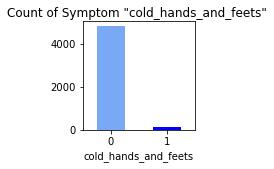

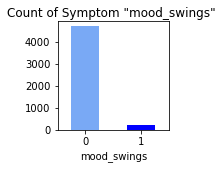

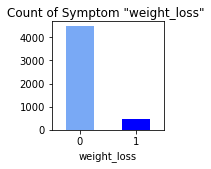

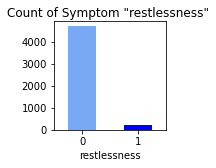

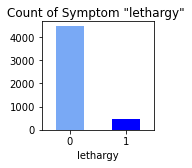

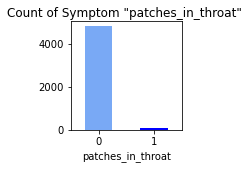

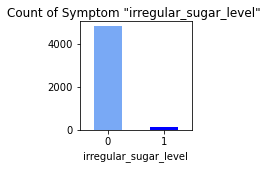

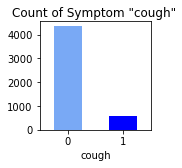

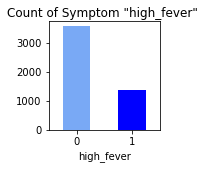

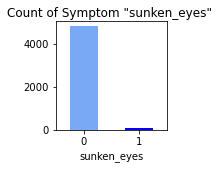

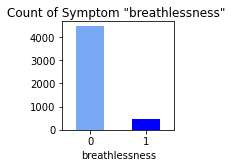

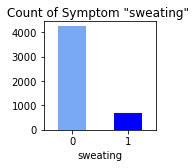

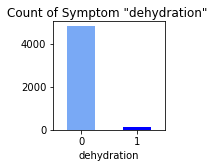

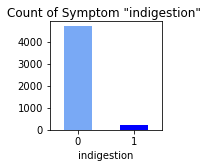

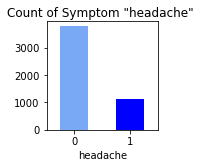

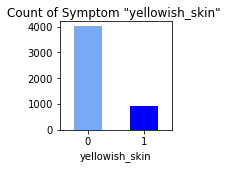

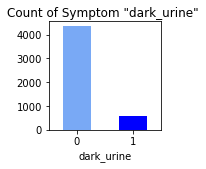

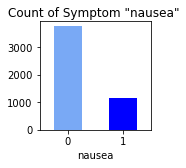

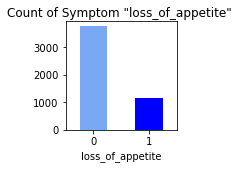

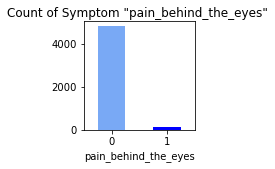

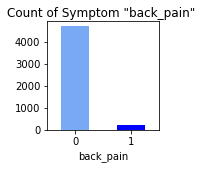

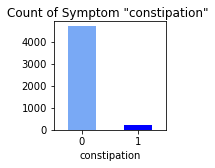

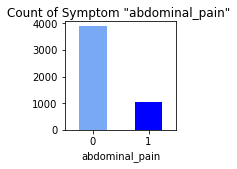

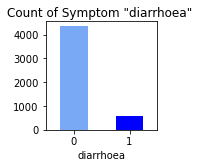

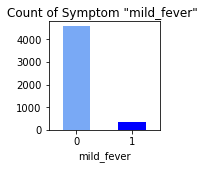

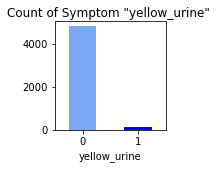

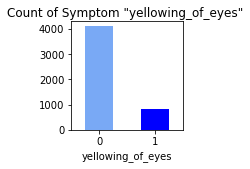

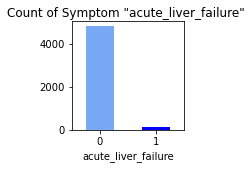

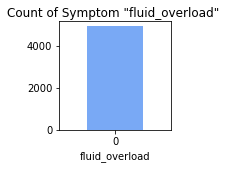

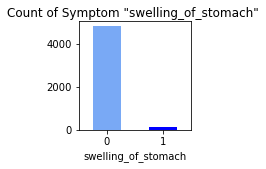

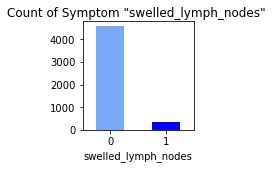

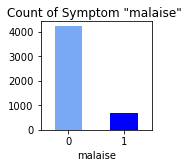

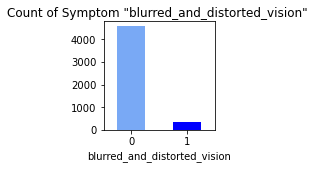

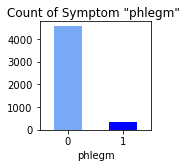

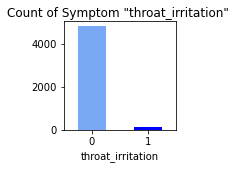

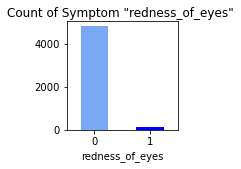

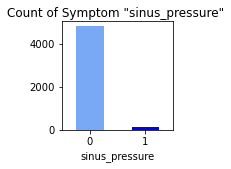

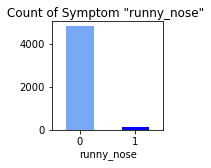

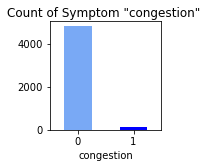

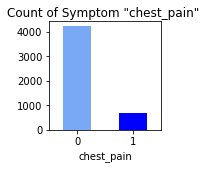

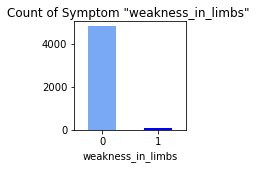

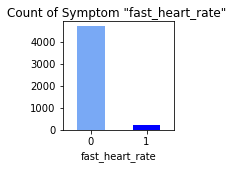

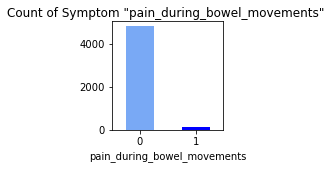

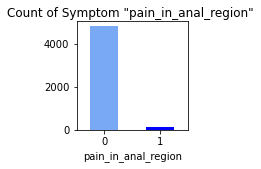

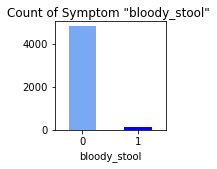

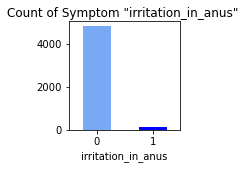

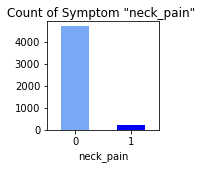

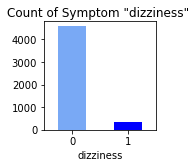

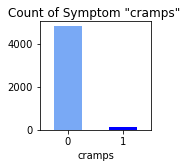

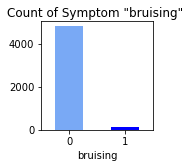

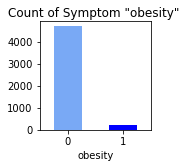

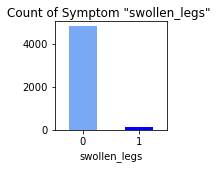

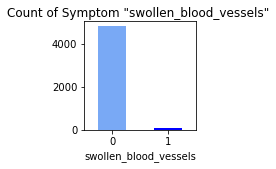

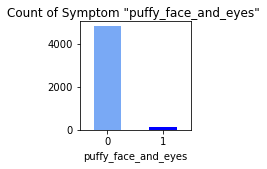

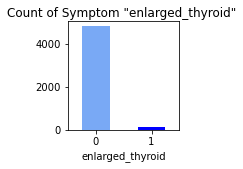

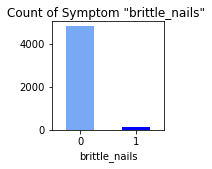

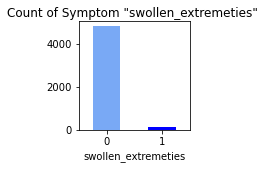

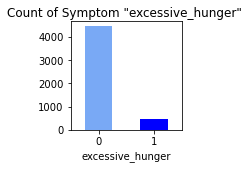

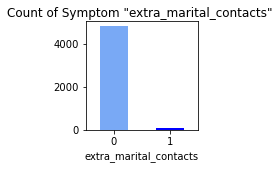

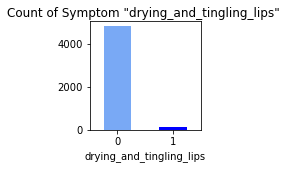

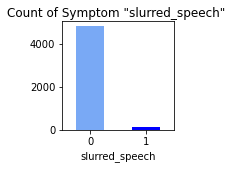

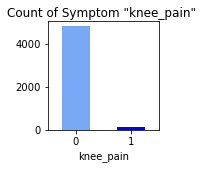

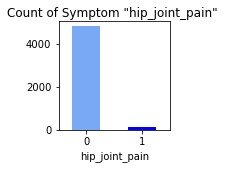

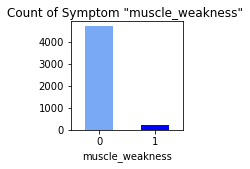

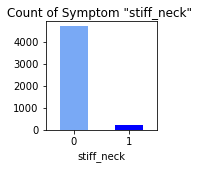

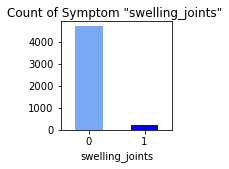

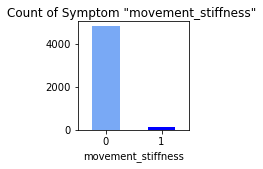

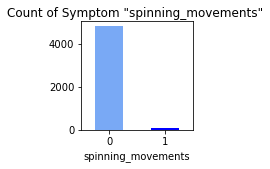

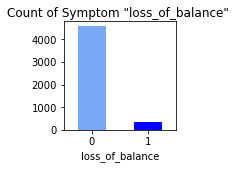

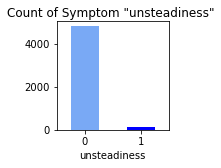

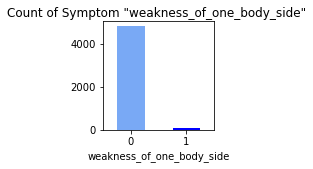

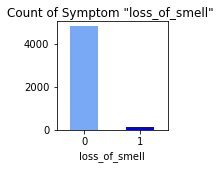

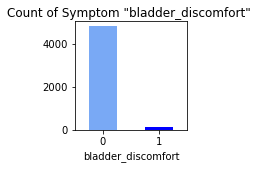

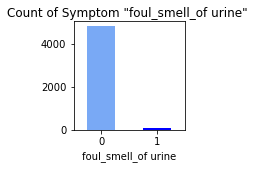

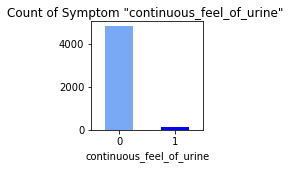

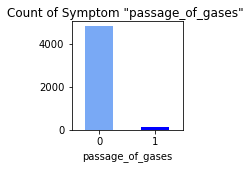

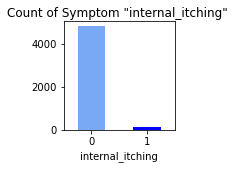

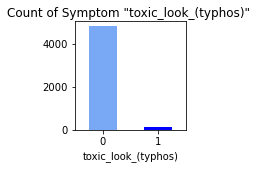

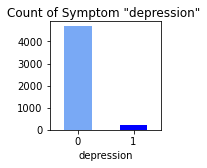

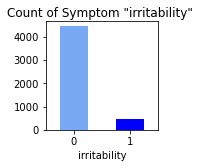

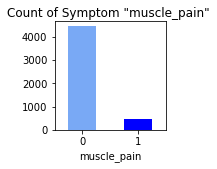

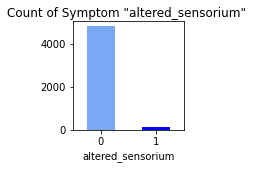

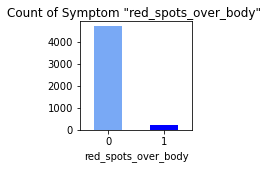

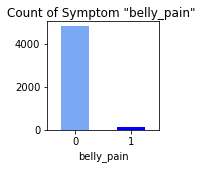

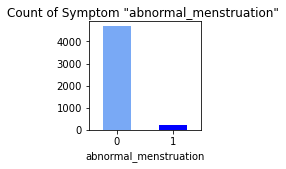

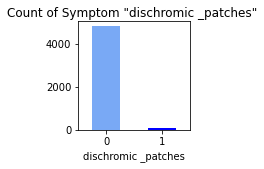

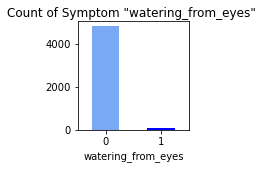

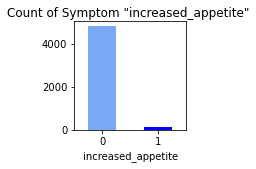

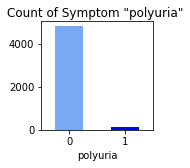

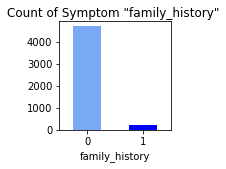

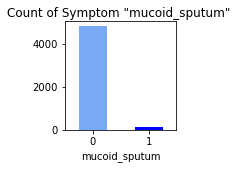

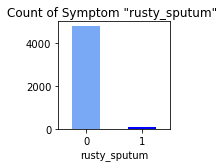

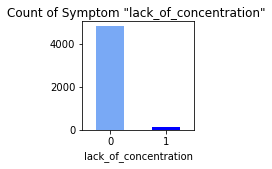

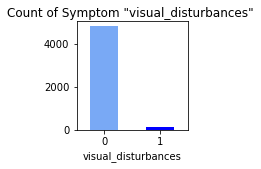

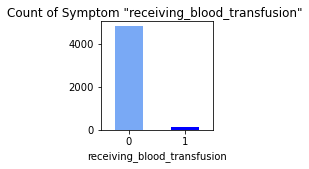

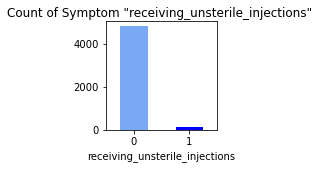

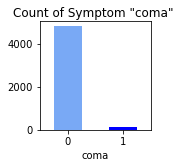

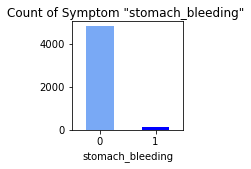

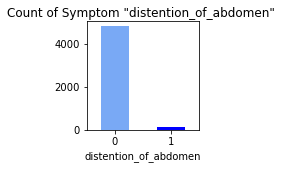

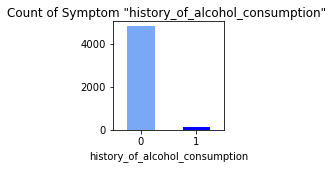

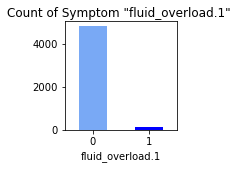

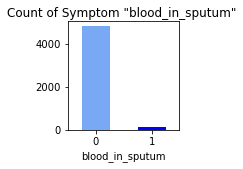

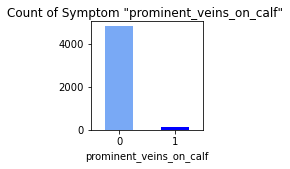

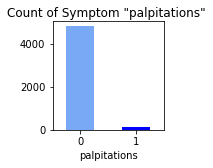

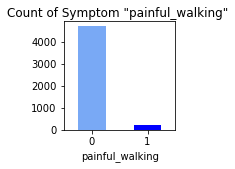

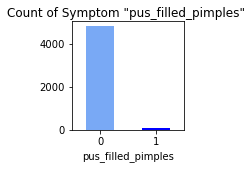

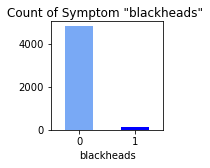

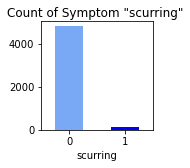

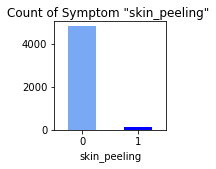

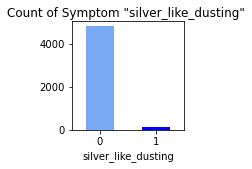

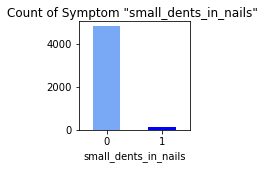

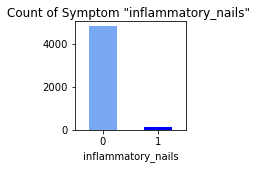

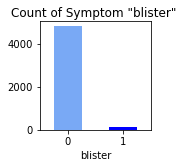

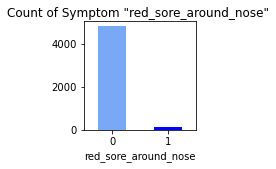

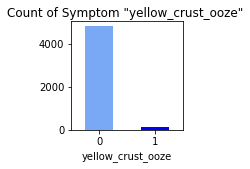

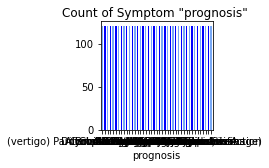

In [28]:
# barplot for the count of the presence and absence of of symptoms in TRAINING data
columns = list(dftrain.columns)
colors = ['#79A9F5', '#0000FF']
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

<ipython-input-29-dd9b0f8a0e56>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(2,2))


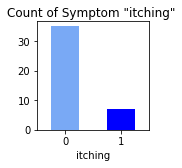

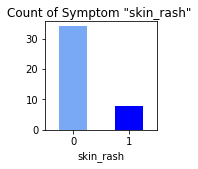

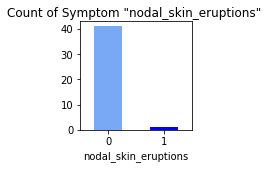

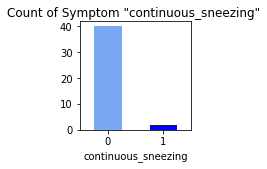

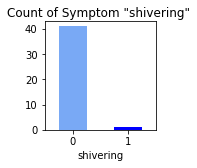

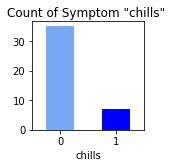

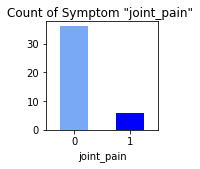

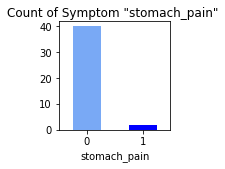

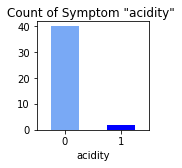

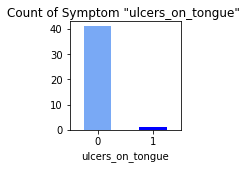

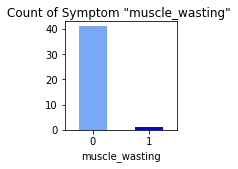

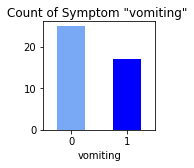

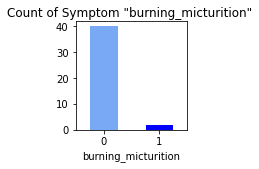

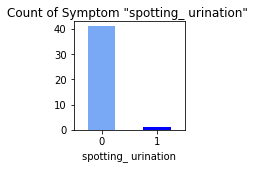

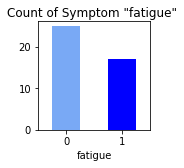

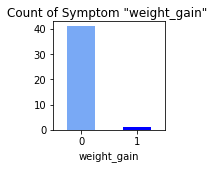

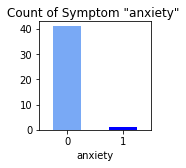

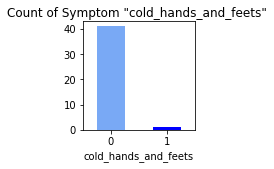

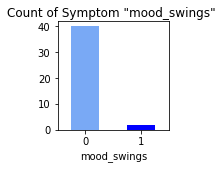

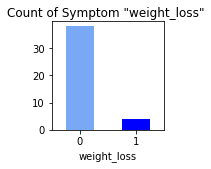

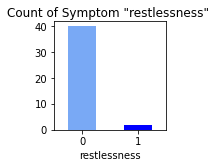

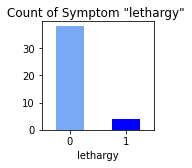

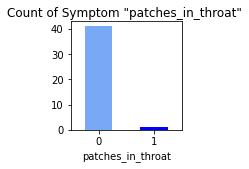

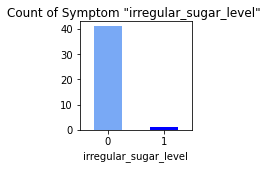

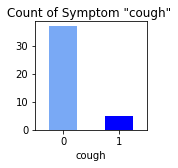

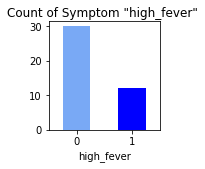

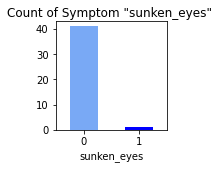

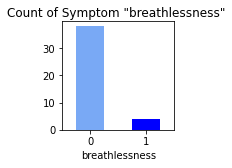

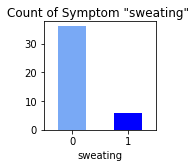

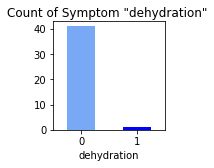

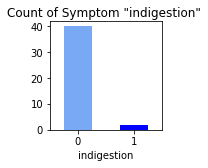

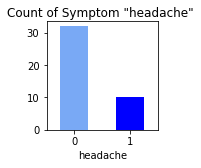

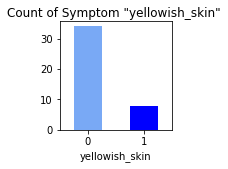

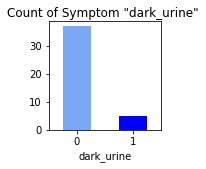

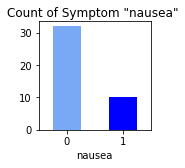

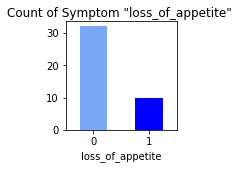

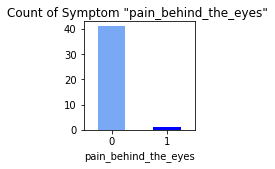

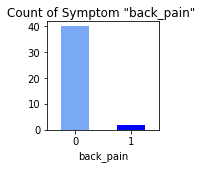

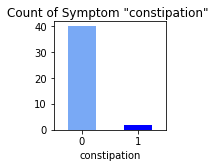

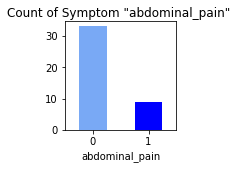

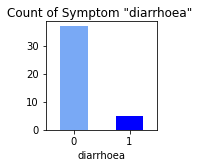

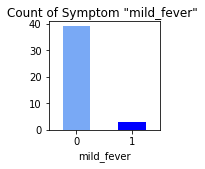

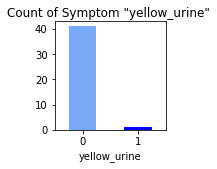

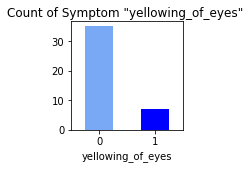

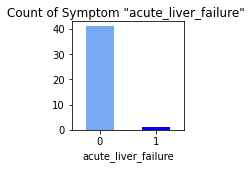

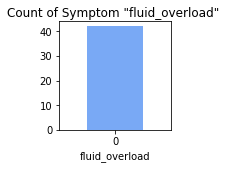

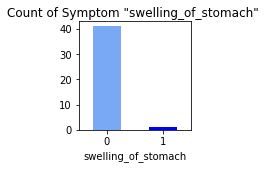

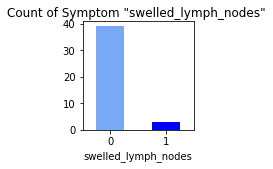

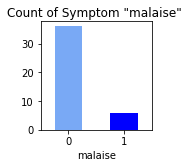

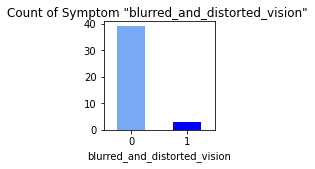

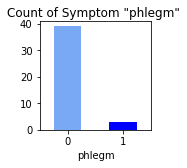

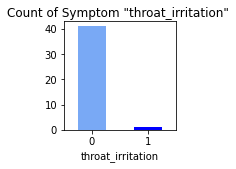

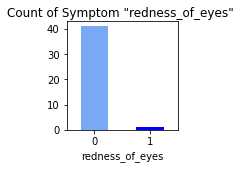

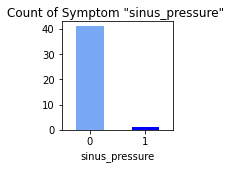

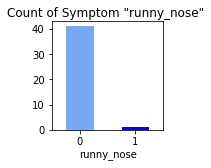

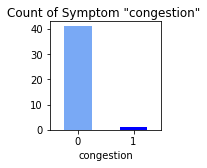

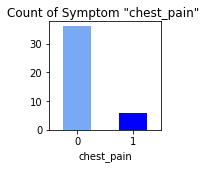

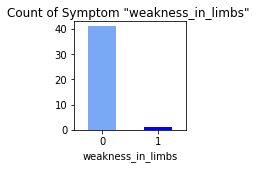

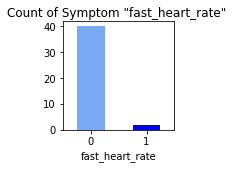

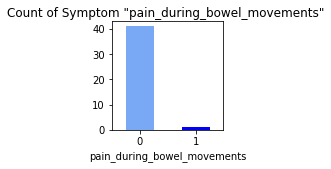

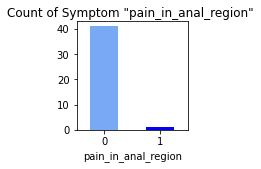

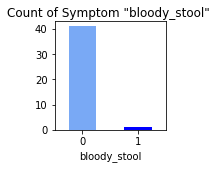

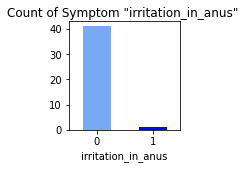

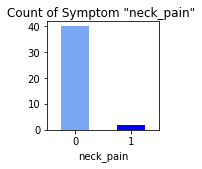

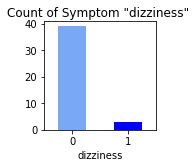

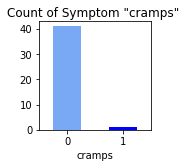

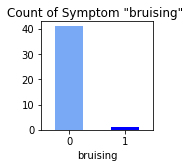

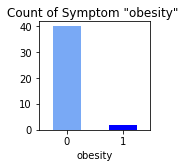

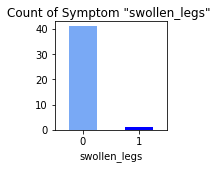

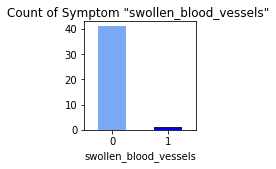

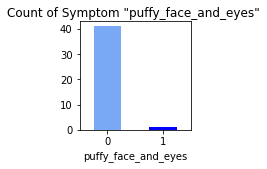

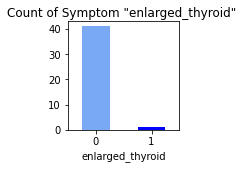

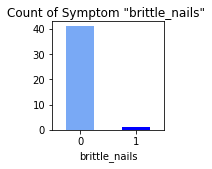

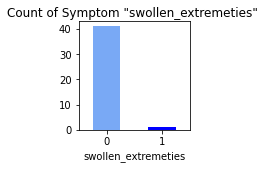

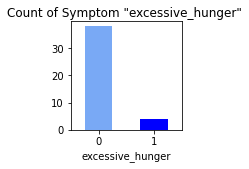

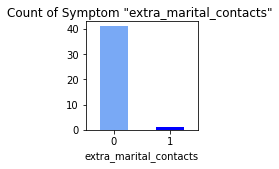

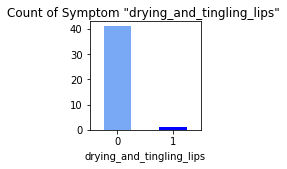

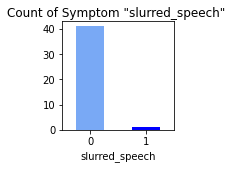

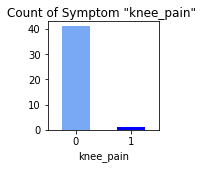

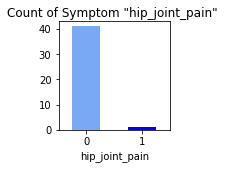

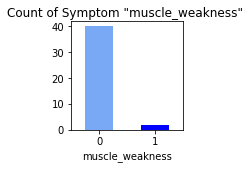

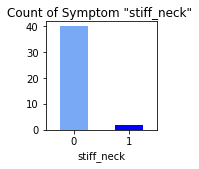

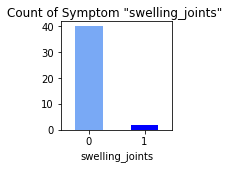

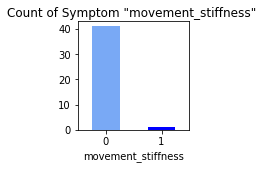

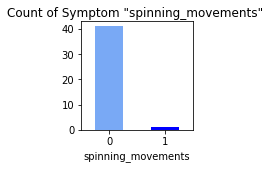

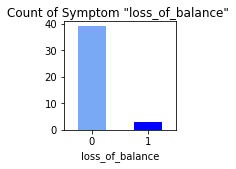

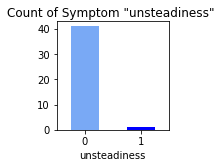

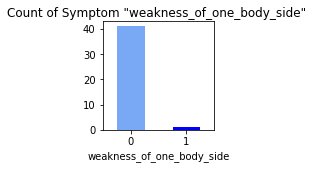

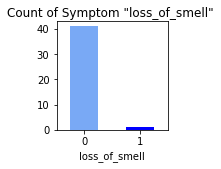

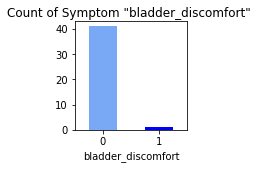

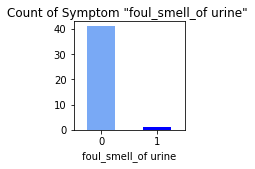

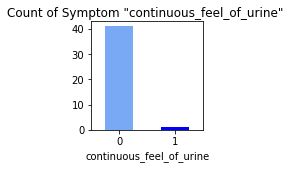

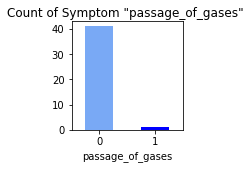

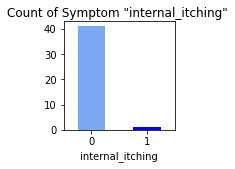

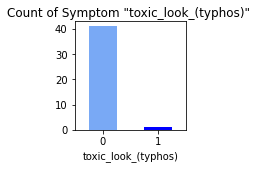

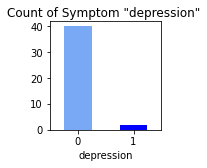

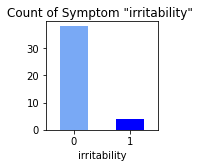

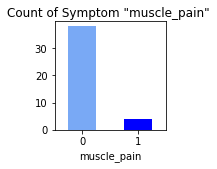

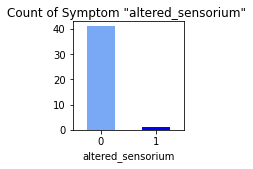

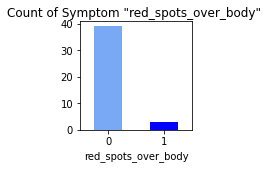

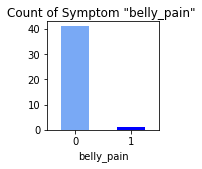

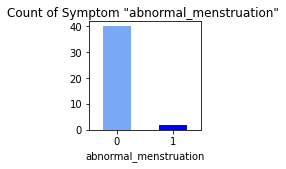

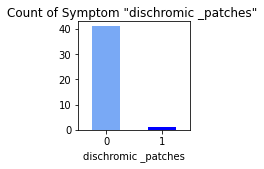

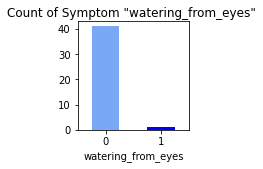

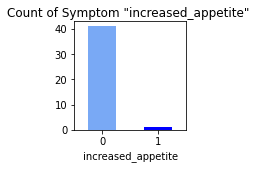

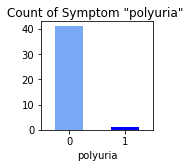

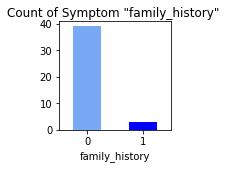

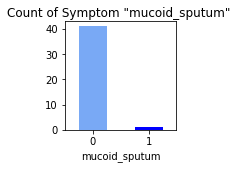

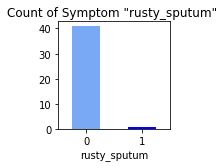

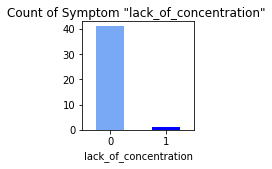

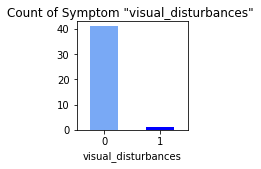

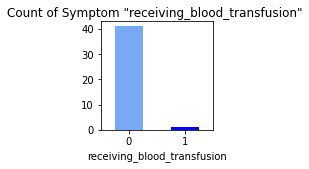

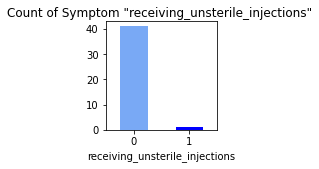

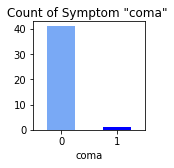

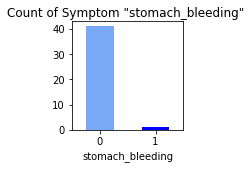

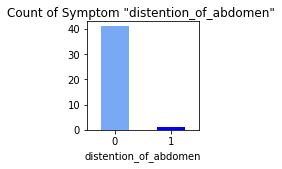

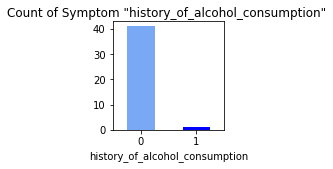

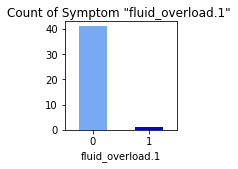

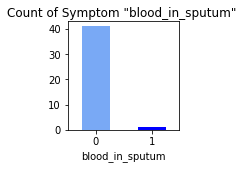

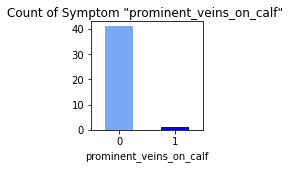

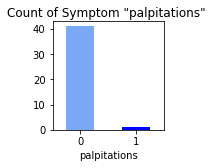

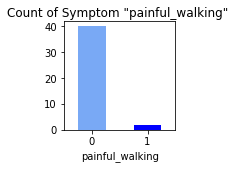

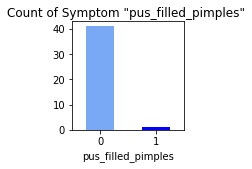

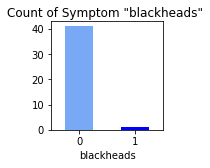

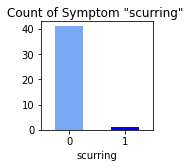

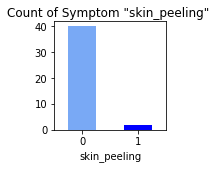

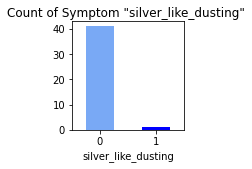

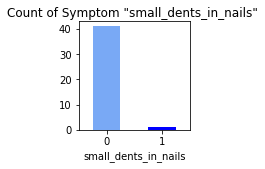

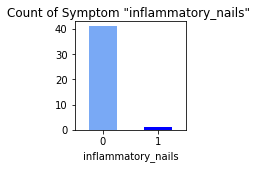

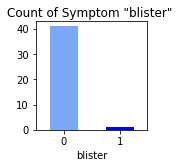

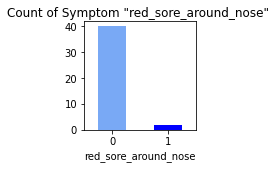

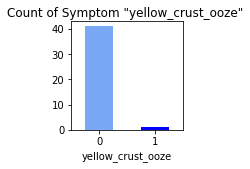

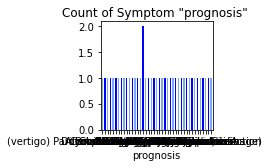

In [29]:
# barplot for the count of the presence and absence of of symptoms in TESTING data
columns = list(dftrain.columns)
colors = ['#79A9F5', '#0000FF']
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

## Barplot Conclusion
>Therefore we can see from the barplots that the presence of symtpoms is very low in comparision to their absence. Most symptoms are absent rather than present. This means that we should not expect a large correlation between symptoms since the visualisation of bar plots suggestss that symptoms are very specific only to specific diseases. This also means that the symptoms are highly correlated to specific diseases, so when it comes to predicting the dieases based on symptoms we can kind of expect that the machine learning models will do this very well. However if a symptom is passed that is not related to the disease then the accuracy of the prediction will drop drastically. 

## Correlation Heatmap
>This heatmap shows that there is weak correlation between individual symptoms meaning that the symptoms are not related to each other and instead are highly correlated to the specific diseases they are related to. In srutinising this observation it is not known how accurate this assertion is since doctors base their diagnosis on understanding the link between a host of symptoms for a particular disease. It may be that symptoms are highly related to a disease but the dataset is not large in terms of the number of labels to be able to link symptoms to each other to predict diseases. Hence an improvement for the model would be be introduce more labels like "insomnia" where features like "axiety" and "palpitations" will make a more meaning contribution across diseases instead of for just two or three diseaes. 

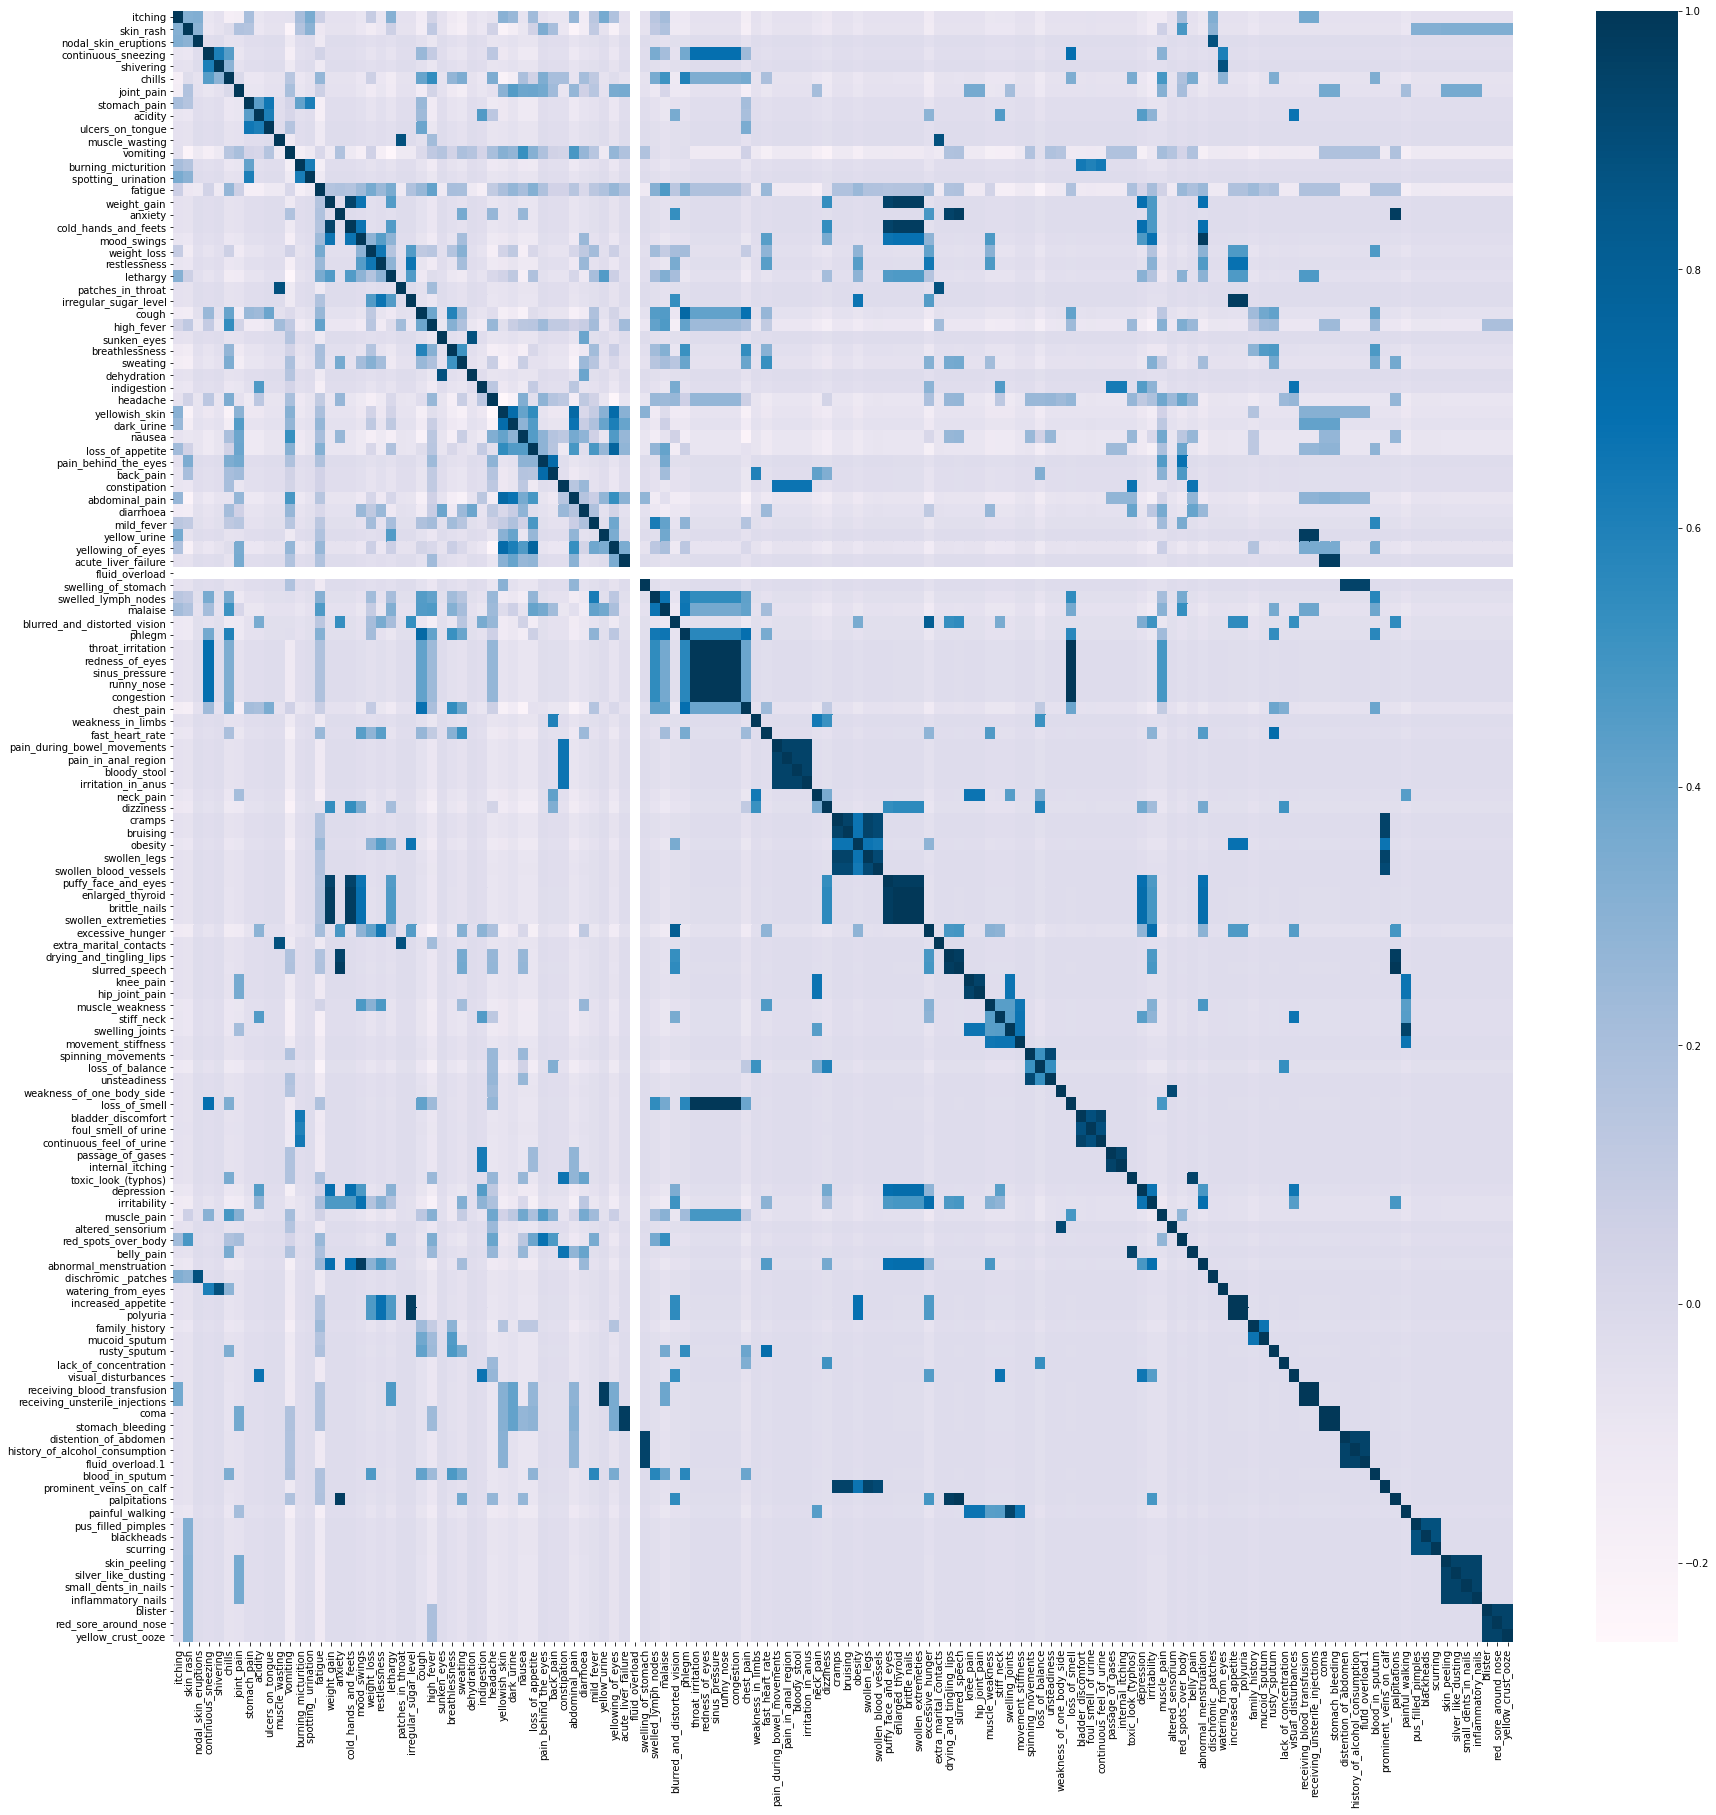

In [33]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
import seaborn as sns
plt.figure(figsize = (30, 30))
sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)
plt.show()

# Summary
>Therefore there are 132 symptoms that are used to predict a total of 42 different types of diseaes. It has been found that the symptoms are weekly related to each other meaning that they are strong correlatd to specific diseases. This could be a problem down the line when it comes to introducing a user to select their symptoms and they select a symptom that is not related to the most likely predicted diagnosis. Improvements in the dataset may be need to be considered in the future and will be mentioned in the results. 